1. Розробити (в Jupyter-ноутбуках) засоби для обліку сервісів тренажерного центру.
Види сервісів характеризуються за назвою, ідентифікаційним номером та вартістю однієї години тренування.
Відвідувачі характеризуються ідентифікаційним номером, прізвищем, іменем та роком народження. Дані про відвідувачів та сервіси задано окремими текстовими файлами.
Дані про тренування мають формат дата-ідентифікаційний номер відвідувача-номер сервісу-тривалість в годинах, їх задано у кількох (>1) текстових файлах.
2. Вивести:
(а) для кожного відвідувача вартість усіх його тренувань, вказуючи у переліку прізвище та ініціали відвідувача.
(6) Побудувати графік відповідно до попереднього пункту:
(в) для сервісу, обраного за допомогою віджету, щомісячну кількість наданих годин за весь час;
(г) для користувача, обраного з випадаючого списку, визначити кіль кість годин по усіх видах його тренувань за період часу, заданий за допомогою віджетів.

In [178]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import datetime

In [179]:
services = pd.read_csv('services.csv')
services

,services,id_s,price
0,Yoga,1,10
1,Gym,2,15
2,Swimming,3,20


In [180]:
visitors = pd.read_csv('visitors.csv')
visitors

,id_v,surname,name,date
0,101,Smith,John,1985
1,102,Johnson,Emily,1990
2,103,Williams,Michael,1995
3,106,Lukianchuk,Denys,2006
4,105,Patrulo,Pavlo,2006
5,104,Parker,Peter,1995


In [181]:
trainings1 = pd.read_csv('trainings1.csv')
trainings1

,date_t,id_v,id_s,time
0,2024-12-01,101,1,1.5
1,2024-12-02,102,2,2.0
2,2024-12-02,103,3,1.0


In [182]:
trainings2 = pd.read_csv('trainings2.csv')
trainings2

,date_t,id_v,id_s,time
0,2024-12-03,104,2,1.0
1,2024-12-03,104,1,1.5
2,2024-12-04,106,3,2.5


In [183]:
trainings = pd.concat([trainings1, trainings2])
trainings

,date_t,id_v,id_s,time
0,2024-12-01,101,1,1.5
1,2024-12-02,102,2,2.0
2,2024-12-02,103,3,1.0
0,2024-12-03,104,2,1.0
1,2024-12-03,104,1,1.5
2,2024-12-04,106,3,2.5


In [184]:
merged = pd.merge(trainings, visitors, on='id_v')
merged = pd.merge(merged, services, on='id_s')
merged

,date_t,id_v,id_s,time,surname,name,date,services,price
0,2024-12-01,101,1,1.5,Smith,John,1985,Yoga,10
1,2024-12-02,102,2,2.0,Johnson,Emily,1990,Gym,15
2,2024-12-02,103,3,1.0,Williams,Michael,1995,Swimming,20
3,2024-12-03,104,2,1.0,Parker,Peter,1995,Gym,15
4,2024-12-03,104,1,1.5,Parker,Peter,1995,Yoga,10
5,2024-12-04,106,3,2.5,Lukianchuk,Denys,2006,Swimming,20


In [185]:
merged['total'] = merged['price'] * merged['time']
merged

,date_t,id_v,id_s,time,surname,name,date,services,price,total
0,2024-12-01,101,1,1.5,Smith,John,1985,Yoga,10,15.0
1,2024-12-02,102,2,2.0,Johnson,Emily,1990,Gym,15,30.0
2,2024-12-02,103,3,1.0,Williams,Michael,1995,Swimming,20,20.0
3,2024-12-03,104,2,1.0,Parker,Peter,1995,Gym,15,15.0
4,2024-12-03,104,1,1.5,Parker,Peter,1995,Yoga,10,15.0
5,2024-12-04,106,3,2.5,Lukianchuk,Denys,2006,Swimming,20,50.0


In [186]:
merged['initials'] = merged['name'].str[0] + '. ' + merged['surname']
grouped_merged = merged.groupby(['initials'])['total'].sum().reset_index()
grouped_merged


,initials,total
0,D. Lukianchuk,50.0
1,E. Johnson,30.0
2,J. Smith,15.0
3,M. Williams,20.0
4,P. Parker,30.0


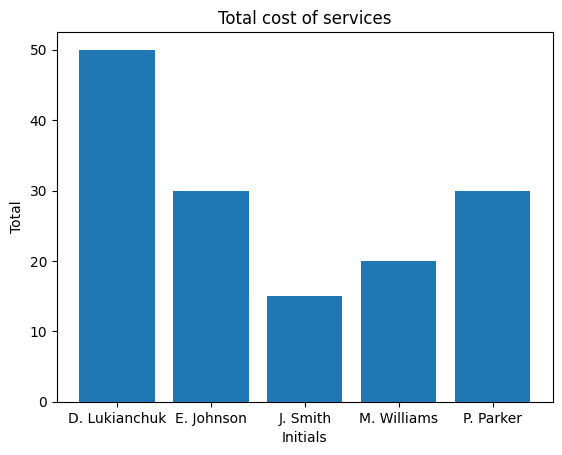

In [187]:
plt.bar(grouped_merged['initials'], grouped_merged['total'])
plt.xlabel('Initials')
plt.ylabel('Total')
plt.title('Total cost of services')
plt.show()

In [188]:
total_hours_servise = merged.groupby('services')['total'].sum()
display(total_hours_servise)

services
Gym         45.0
Swimming    70.0
Yoga        30.0
Name: total, dtype: float64

In [189]:
def get_total_hours(name_servise):
    hours = total_hours_servise.loc[name_servise]

    print('Total hours:', hours)

In [190]:
wd = widgets.Dropdown(
    options = services['services'].unique(),
    description='Сервіси',
    disabled=False
)

In [191]:
widget = widgets.interactive(get_total_hours, name_servise=wd)
display(widget)

interactive(children=(Dropdown(description='Сервіси', options=('Yoga', 'Gym', 'Swimming'), value='Yoga'), Outp…

In [192]:
amount_hours_for_visitor = merged.groupby(['initials', 'services', 'date_t'])['time'].sum().reset_index()

In [193]:
def total_hours_visitor(name_visitor, start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    filt = (amount_hours_for_visitor['date_t'] >= start_date) & (amount_hours_for_visitor['date_t'] <= end_date)
    filtered_df = amount_hours_for_visitor.loc[filt]

    filtered_df = filtered_df.groupby(['initials', 'services'])['time'].sum().reset_index()
    group_df = filtered_df.groupby('initials')

    if name_visitor not in filtered_df['initials'].values:
        print('None')
    else:
        total_hours_for_visitor = group_df.get_group(name_visitor)
        display(total_hours_for_visitor)
    

In [196]:
amount_hours_for_visitor['date_t'] = pd.to_datetime(amount_hours_for_visitor['date_t'])

start = widgets.DatePicker(
    description = 'start date',
    value = amount_hours_for_visitor['date_t'].min(),
)

end = widgets.DatePicker(
    description = 'end date',
    value = amount_hours_for_visitor['date_t'].max(),
)

name_widget = widgets.Dropdown(
    description = 'name',
    options = amount_hours_for_visitor['initials'].unique(),
    value = amount_hours_for_visitor['initials'].loc[0]
)

In [197]:
widget = widgets.interactive(total_hours_visitor, name_visitor = name_widget, start_date = start, end_date = end)
display(widget)

interactive(children=(Dropdown(description='name', options=('D. Lukianchuk', 'E. Johnson', 'J. Smith', 'M. Wil…